In [1]:
#Import Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as mp
import requests 
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
#Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the Dataframe
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, 78],
    labels=["Gen Z", "Millennials", "Gen X", "Baby Boomer"],
)
shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millennials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [4]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", "Item Purchased", "Category", "Purchase Amount (USD)", "Location", "Size", "Color", "Season", "Review Rating", "Subscription Status", "Shipping Type", "Discount Applied", "Promo Code Used", "Previous Purchases", "Payment Method", "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Create a sample that circumvents base rate fallacy
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1499,1500,19,Gen Z,Male,Boots,Footwear,85,Georgia,S,Olive,Fall,3.4,No,Free Shipping,Yes,Yes,24,Credit Card,Every 3 Months
25,26,18,Gen Z,Male,Hoodie,Clothing,25,Texas,M,Silver,Summer,3.6,Yes,Express,Yes,Yes,14,PayPal,Annually
1610,1611,20,Gen Z,Male,Socks,Clothing,31,Tennessee,L,Purple,Spring,3.4,No,2-Day Shipping,Yes,Yes,1,PayPal,Annually
368,369,24,Gen Z,Male,Handbag,Accessories,39,Oklahoma,M,Charcoal,Spring,4.5,Yes,Standard,Yes,Yes,29,Cash,Monthly
332,333,19,Gen Z,Male,Shirt,Clothing,86,New York,M,Maroon,Winter,2.8,Yes,2-Day Shipping,Yes,Yes,5,Credit Card,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,741,26,Gen Z,Male,Jeans,Clothing,69,South Dakota,M,Orange,Summer,2.8,Yes,Next Day Air,Yes,Yes,22,Credit Card,Fortnightly
2282,2283,18,Gen Z,Male,Sneakers,Footwear,97,Idaho,S,Red,Fall,4.2,No,2-Day Shipping,No,No,8,Credit Card,Annually
1848,1849,19,Gen Z,Male,Jeans,Clothing,73,Maine,XL,Yellow,Winter,2.7,No,Express,No,No,34,Cash,Every 3 Months
710,711,22,Gen Z,Male,Scarf,Accessories,91,Virginia,L,Turquoise,Spring,4.1,Yes,Standard,Yes,Yes,26,PayPal,Fortnightly


In [6]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1406,1407,32,Millennials,Male,Shirt,Clothing,46,Washington,L,Turquoise,Spring,3.6,No,Express,Yes,Yes,15,Debit Card,Monthly
892,893,31,Millennials,Male,Shorts,Clothing,64,New Mexico,L,Gray,Summer,2.7,Yes,Free Shipping,Yes,Yes,43,Debit Card,Monthly
1478,1479,28,Millennials,Male,Gloves,Accessories,23,Washington,M,Blue,Summer,4.2,No,Free Shipping,Yes,Yes,13,Venmo,Bi-Weekly
1245,1246,42,Millennials,Male,Dress,Clothing,31,New York,M,Violet,Fall,3.4,No,Standard,Yes,Yes,30,Bank Transfer,Weekly
825,826,27,Millennials,Male,Belt,Accessories,94,Nebraska,XL,Brown,Fall,3.6,Yes,Next Day Air,Yes,Yes,17,Cash,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,2566,30,Millennials,Male,Socks,Clothing,43,Vermont,S,Indigo,Fall,3.6,No,Store Pickup,No,No,8,Venmo,Quarterly
2640,2641,30,Millennials,Male,Skirt,Clothing,75,Indiana,L,Olive,Summer,4.0,No,Store Pickup,No,No,45,Venmo,Bi-Weekly
694,695,41,Millennials,Male,Dress,Clothing,21,Kentucky,S,Charcoal,Fall,3.5,Yes,2-Day Shipping,Yes,Yes,38,Venmo,Every 3 Months
665,666,41,Millennials,Male,Pants,Clothing,55,New Mexico,M,Peach,Spring,4.9,Yes,2-Day Shipping,Yes,Yes,50,Credit Card,Annually


In [7]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1921,1922,47,Gen X,Male,Shirt,Clothing,36,Michigan,M,Green,Fall,3.5,No,Store Pickup,No,No,13,Venmo,Annually
1742,1743,51,Gen X,Male,Sandals,Footwear,80,Kansas,XL,White,Spring,4.3,No,Express,No,No,18,Venmo,Every 3 Months
1818,1819,58,Gen X,Male,Sunglasses,Accessories,39,North Carolina,M,White,Fall,3.8,No,Express,No,No,47,Debit Card,Every 3 Months
1086,1087,53,Gen X,Male,Sunglasses,Accessories,62,Alaska,M,Olive,Winter,3.0,No,Free Shipping,Yes,Yes,27,PayPal,Bi-Weekly
1199,1200,49,Gen X,Male,Sandals,Footwear,89,Maryland,M,Indigo,Fall,4.5,No,Free Shipping,Yes,Yes,3,Debit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,707,46,Gen X,Male,Jeans,Clothing,47,Iowa,L,Turquoise,Summer,4.8,Yes,Express,Yes,Yes,27,Debit Card,Weekly
2500,2501,59,Gen X,Male,Gloves,Accessories,84,Massachusetts,M,Violet,Fall,2.9,No,Store Pickup,No,No,32,Cash,Bi-Weekly
2358,2359,53,Gen X,Male,Sweater,Clothing,93,Texas,L,Pink,Spring,3.8,No,Standard,No,No,38,Credit Card,Quarterly
1988,1989,46,Gen X,Male,Pants,Clothing,79,Virginia,M,Gold,Winter,3.9,No,Free Shipping,No,No,26,Bank Transfer,Weekly


In [8]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2299,2300,64,Baby Boomer,Male,Coat,Outerwear,57,Idaho,M,Violet,Summer,3.7,No,Store Pickup,No,No,48,Credit Card,Every 3 Months
1107,1108,69,Baby Boomer,Male,Sneakers,Footwear,62,Texas,M,Peach,Fall,2.8,No,Store Pickup,Yes,Yes,26,Bank Transfer,Weekly
381,382,66,Baby Boomer,Male,Jewelry,Accessories,25,Maine,L,Lavender,Winter,3.4,Yes,Store Pickup,Yes,Yes,3,Credit Card,Every 3 Months
2138,2139,67,Baby Boomer,Male,Sweater,Clothing,42,Mississippi,M,Teal,Fall,2.8,No,Next Day Air,No,No,36,Venmo,Quarterly
267,268,64,Baby Boomer,Male,Sweater,Clothing,54,Maryland,M,Olive,Spring,3.9,Yes,2-Day Shipping,Yes,Yes,42,Venmo,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,671,63,Baby Boomer,Male,Sweater,Clothing,41,Louisiana,XL,Purple,Spring,4.8,Yes,Next Day Air,Yes,Yes,37,Cash,Bi-Weekly
1035,1036,61,Baby Boomer,Male,Blouse,Clothing,89,Georgia,M,Brown,Fall,2.8,Yes,Express,Yes,Yes,32,Venmo,Annually
972,973,61,Baby Boomer,Male,Sneakers,Footwear,61,Colorado,L,Gold,Winter,3.0,Yes,Standard,Yes,Yes,33,Credit Card,Weekly
563,564,61,Baby Boomer,Male,Shoes,Footwear,99,Idaho,M,Black,Fall,4.4,Yes,Standard,Yes,Yes,16,Debit Card,Quarterly


In [9]:

GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3074,3075,26,Gen Z,Female,Boots,Footwear,55,Massachusetts,L,Maroon,Winter,4.2,No,Next Day Air,No,No,34,Debit Card,Fortnightly
3467,3468,18,Gen Z,Female,Scarf,Accessories,45,Texas,M,Charcoal,Fall,5.0,No,Next Day Air,No,No,5,Credit Card,Annually
3594,3595,19,Gen Z,Female,Scarf,Accessories,87,Alabama,L,Charcoal,Summer,2.6,No,2-Day Shipping,No,No,29,Venmo,Quarterly
2845,2846,26,Gen Z,Female,Backpack,Accessories,77,South Dakota,L,Lavender,Summer,4.1,No,Express,No,No,39,Debit Card,Every 3 Months
3506,3507,18,Gen Z,Female,Shirt,Clothing,57,Illinois,L,Olive,Winter,3.7,No,2-Day Shipping,No,No,12,Cash,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,25,Gen Z,Female,Sneakers,Footwear,60,South Dakota,M,Cyan,Fall,2.9,No,Free Shipping,No,No,30,Debit Card,Annually
3752,3753,24,Gen Z,Female,Coat,Outerwear,81,Washington,L,Pink,Winter,4.1,No,2-Day Shipping,No,No,43,Venmo,Weekly
3491,3492,22,Gen Z,Female,Pants,Clothing,28,Maine,M,Orange,Winter,4.3,No,Express,No,No,15,Cash,Monthly
3300,3301,26,Gen Z,Female,Hat,Accessories,80,Oklahoma,M,Charcoal,Spring,4.0,No,Express,No,No,40,Bank Transfer,Bi-Weekly


In [10]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3172,3173,57,Gen X,Female,Socks,Clothing,52,Missouri,M,Olive,Fall,3.7,No,Standard,No,No,30,Debit Card,Bi-Weekly
3501,3502,53,Gen X,Female,Shoes,Footwear,87,Nebraska,M,Silver,Fall,4.8,No,Standard,No,No,43,Bank Transfer,Weekly
3521,3522,52,Gen X,Female,Shoes,Footwear,50,Maryland,M,Pink,Winter,3.7,No,Store Pickup,No,No,35,Venmo,Weekly
3042,3043,53,Gen X,Female,Coat,Outerwear,27,South Dakota,L,Turquoise,Winter,2.9,No,Next Day Air,No,No,14,PayPal,Every 3 Months
2869,2870,57,Gen X,Female,Socks,Clothing,58,Georgia,M,White,Summer,4.2,No,Standard,No,No,16,Bank Transfer,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2909,43,Gen X,Female,Blouse,Clothing,87,Texas,M,Beige,Winter,3.1,No,Store Pickup,No,No,15,Debit Card,Every 3 Months
3860,3861,57,Gen X,Female,Sunglasses,Accessories,64,Pennsylvania,M,Turquoise,Summer,4.4,No,Next Day Air,No,No,44,Cash,Annually
3003,3004,51,Gen X,Female,Blouse,Clothing,53,Oregon,M,Brown,Fall,2.8,No,Express,No,No,13,Credit Card,Every 3 Months
2906,2907,58,Gen X,Female,Coat,Outerwear,27,Virginia,M,Indigo,Spring,3.9,No,Standard,No,No,7,Venmo,Annually


In [11]:

Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3091,3092,68,Baby Boomer,Female,Dress,Clothing,81,Nevada,L,Orange,Winter,3.4,No,2-Day Shipping,No,No,46,Credit Card,Annually
3223,3224,68,Baby Boomer,Female,Shirt,Clothing,65,Montana,S,Gray,Spring,3.9,No,Standard,No,No,36,Venmo,Bi-Weekly
3756,3757,64,Baby Boomer,Female,Skirt,Clothing,69,South Carolina,L,Teal,Spring,4.8,No,Express,No,No,42,Debit Card,Bi-Weekly
2702,2703,70,Baby Boomer,Female,Shoes,Footwear,37,Texas,L,Gray,Fall,4.0,No,Next Day Air,No,No,39,Debit Card,Fortnightly
3458,3459,68,Baby Boomer,Female,Jewelry,Accessories,37,West Virginia,L,Violet,Spring,3.4,No,Standard,No,No,24,Venmo,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2949,61,Baby Boomer,Female,Pants,Clothing,83,Vermont,M,Violet,Winter,3.1,No,Standard,No,No,38,Debit Card,Bi-Weekly
3671,3672,62,Baby Boomer,Female,Handbag,Accessories,66,Illinois,L,Pink,Summer,4.8,No,2-Day Shipping,No,No,20,Venmo,Quarterly
3818,3819,70,Baby Boomer,Female,Sneakers,Footwear,41,Oregon,XL,Indigo,Winter,3.8,No,Free Shipping,No,No,42,Cash,Monthly
3161,3162,66,Baby Boomer,Female,Dress,Clothing,77,Massachusetts,S,Charcoal,Winter,4.2,No,2-Day Shipping,No,No,43,Cash,Monthly


In [12]:
GenZ_male["Color"]

1499        Olive
25         Silver
1610       Purple
368      Charcoal
332        Maroon
          ...    
740        Orange
2282          Red
1848       Yellow
710     Turquoise
446        Silver
Name: Color, Length: 198, dtype: object

In [13]:
organized_df["Age Groups"]

0             Gen X
1             Gen Z
2             Gen X
3             Gen Z
4             Gen X
           ...     
3895    Millennials
3896          Gen X
3897          Gen X
3898          Gen X
3899          Gen X
Name: Age Groups, Length: 3900, dtype: category
Categories (4, object): ['Gen Z' < 'Millennials' < 'Gen X' < 'Baby Boomer']

In [14]:
organized_df["Color"]

0            Gray
1          Maroon
2          Maroon
3          Maroon
4       Turquoise
          ...    
3895    Turquoise
3896        White
3897        Green
3898        Brown
3899        Beige
Name: Color, Length: 3900, dtype: object

In [15]:
organized_df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [16]:
#organized_df['Color']
#color_map = {
    #'Gray': ['Gray', 'Silver', 'Beige'],
    #'Red': ['Red', 'Maroon'],
    #'Blue': ['Blue', 'Teal', 'Cyan'],
    #'White': 'White', 
    #'Black': ['Black', 'Charcoal'],
    #'Pink': ['Pink', 'Magenta'],
    #'Purple': ['Purple', 'Violet', 'Lavender', 'Indigo'],
    #'Green': ['Green', 'Olive'],
    #'Yellow': ['Yellow', 'Gold'],
    #'Orange': ['Orange', 'Peach'],
    #'Brown': ['Brown']
#}

#def classify_color(color):
    #return color_map.get(color, 'Other')

#categories = organized_df.apply(classify_color)

#print(categories)

IndentationError: unexpected indent (106555856.py, line 17)

In [32]:
color_data = organized_df['Color']

color_organized_df = pd.DataFrame(color_data)

def classify_text(color_data):
    if color_data in ['Gray', 'Silver', 'Beige']:
        return 'Gray'
    elif color_data in ['Red', 'Maroon']:
        return 'Red'
    elif color_data in ['Blue', 'Teal', 'Cyan', 'Turquoise']:
        return 'Blue'
    elif color_data in ['White']:
        return 'White'
    elif color_data in ['Black', 'Charcoal']:
        return 'Black'
    elif color_data in ['Pink', 'Magenta']:
        return 'Pink'
    elif color_data in ['Purple', 'Violet', 'Lavender', 'Indigo']:
        return 'Purple'
    elif color_data in ['Green', 'Olive']:
        return 'Green'
    elif color_data in ['Yellow', 'Gold']:
        return 'Yellow'
    elif color_data in ['Orange', 'Peach']:
        return 'Orange'
    else:
        return 'Brown'
organized_df['Color Classifications'] = color_data.apply(classify_text) 

color_organized_df = organized_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Color Classifications", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
color_organized_df


C:\Users\14843\AppData\Local\Temp\ipykernel_16260\3838177882.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organized_df['Color Classifications'] = color_data.apply(classify_text)


,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Red,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Red,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Red,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Blue,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Blue,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Gen X,Female,Shoes,Footwear,77,Minnesota,S,Brown,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [35]:
# Determine the most frequently purchased item color overall
color_frequency_counts = color_organized_df['Color Classifications'].value_counts().reset_index()
color_frequency_counts.columns = ['Color Classifications', 'Count']
print(color_frequency_counts)

   Color Classifications  Count
0                   Blue    635
1                 Purple    611
2                   Gray    479
3                  Green    346
4                  Black    320
5                 Yellow    312
6                    Red    306
7                   Pink    305
8                 Orange    303
9                  White    142
10                 Brown    141


In [36]:
# Color preference by age demographic
color_preference = color_organized_df.pivot_table(index='Color Classifications', columns='Age Groups', aggfunc='size', fill_value=0)
color_preference

Age Groups,Gen Z,Millennials,Gen X,Baby Boomer
Color Classifications,,,,
Black,53,88,110,69
Blue,109,163,232,131
Brown,18,56,40,27
Gray,75,143,156,105
Green,64,105,111,66
Orange,48,103,92,60
Pink,51,105,99,50
Purple,90,191,199,131
Red,55,100,105,46


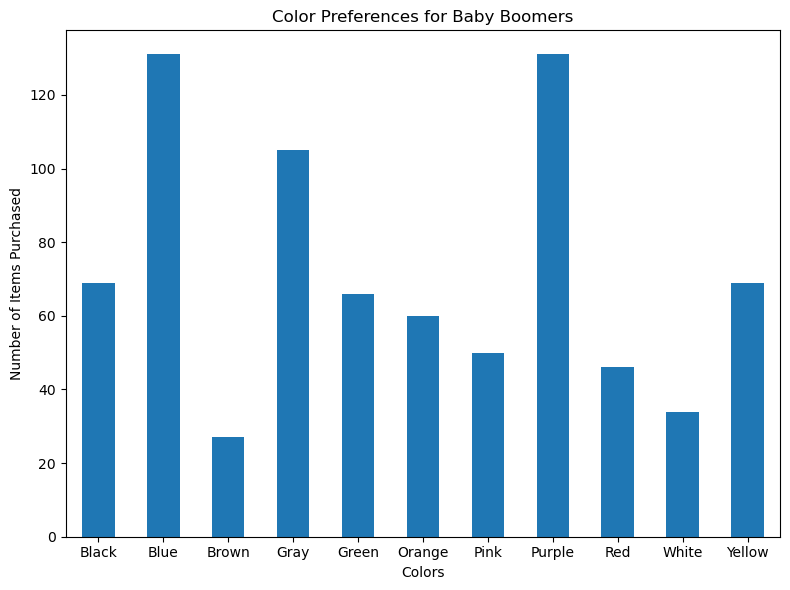

In [172]:
# Plot the numbers of items purchased for each color for the Baby Boomer generation
colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
baby_boomer_data = color_preference.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6),)
#ax.bar(baby_boomer_data.T.index, baby_boomer_da.T["Fall"], color = color)
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Purchased')
plt.title('Color Preferences for Baby Boomers')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Baby Boomers.

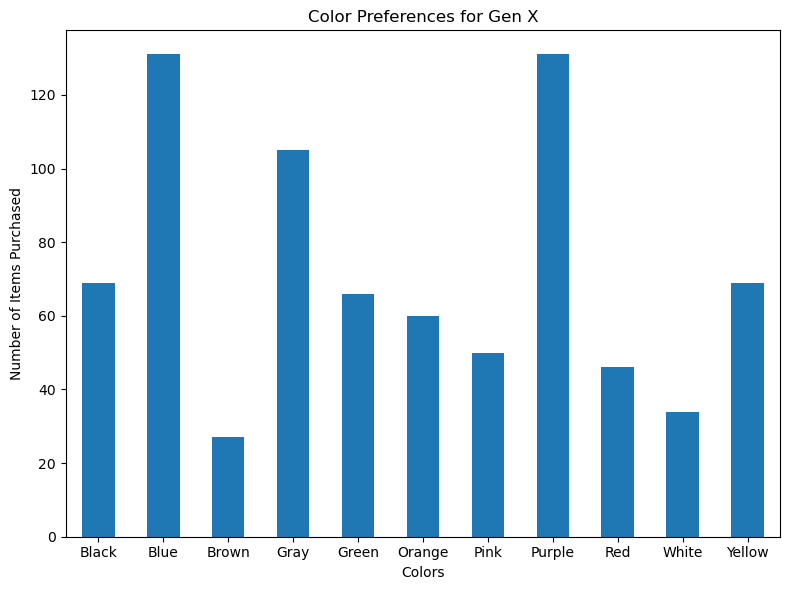

In [173]:
# Plot the numbers of items purchased for each color for the Gen X generation
Gen_X_data = color_preference.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Purchased')
plt.title('Color Preferences for Gen X')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Gen X.

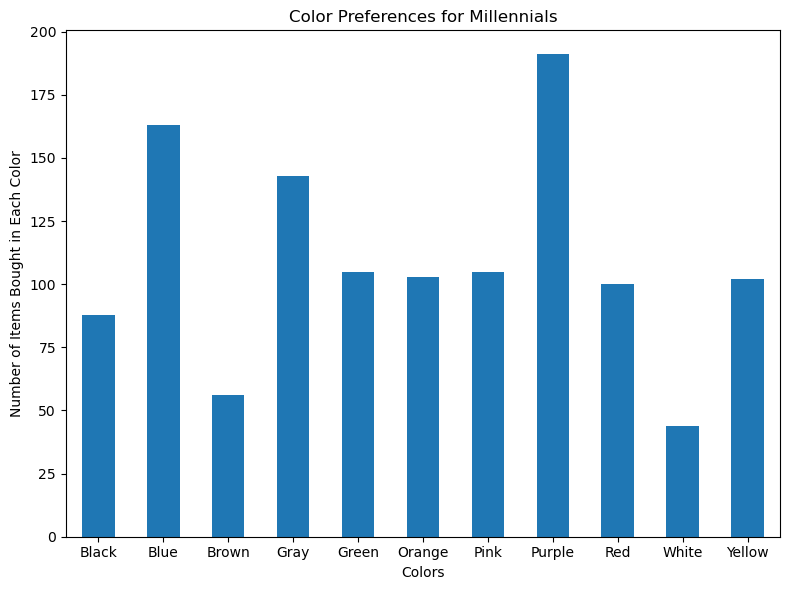

In [45]:
# Plot the numbers of items purchased for each color for the Milennial generation
Millennial_data = color_preference.loc[:, 'Millennials']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Bought in Each Color')
plt.title('Color Preferences for Millennials')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among millennials.

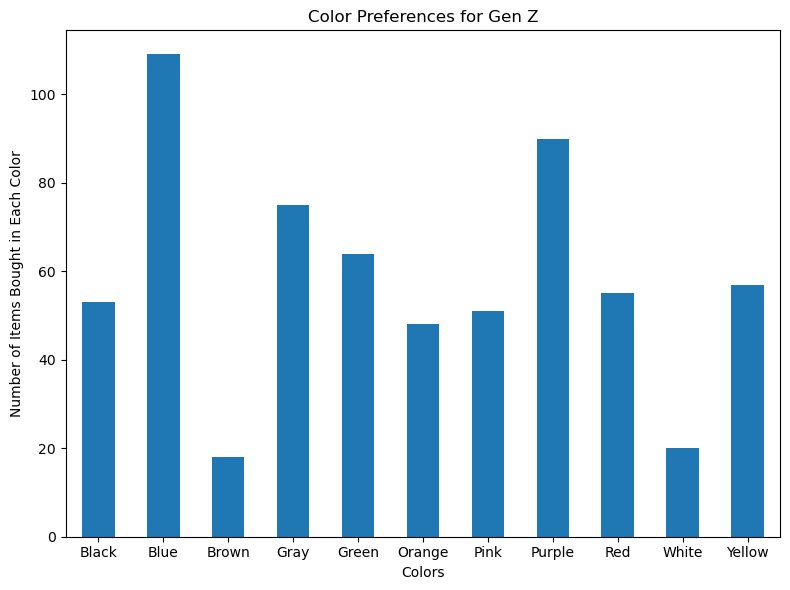

In [96]:
# Determine the frequency of color item purchases for Gen Z
Gen_Z_data = color_preference.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Colors')
plt.ylabel('Number of Items Bought in Each Color')
plt.title('Color Preferences for Gen Z')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

Blue and purple were the most popular colors and brown and white were the least among Gen Z.

In [70]:
# Percentage of Black
black_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Black"].shape[0]
total_count = len(organized_df["Color Classifications"])
black_percent = (black_count/total_count) * 100
print(black_percent)

# Percentage of Blue
blue_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Blue"].shape[0]
total_count = len(organized_df["Color Classifications"])
blue_percent = (blue_count/total_count) * 100

# Percentage of Brown
brown_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Brown"].shape[0]
total_count = len(organized_df["Color Classifications"])
brown_percent = (brown_count/total_count) * 100

# Percentage of Gray
gray_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Gray"].shape[0]
total_count = len(organized_df["Color Classifications"])
gray_percent = (gray_count/total_count) * 100

# Percentage of Gray
green_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Green"].shape[0]
total_count = len(organized_df["Color Classifications"])
green_percent = (green_count/total_count) * 100

# Percentage of Orange
orange_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Orange"].shape[0]
total_count = len(organized_df["Color Classifications"])
orange_percent = (orange_count/total_count) * 100

# Percentage of Pink
pink_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Pink"].shape[0]
total_count = len(organized_df["Color Classifications"])
pink_percent = (pink_count/total_count) * 100

# Percentage of Purple
purple_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Purple"].shape[0]
total_count = len(organized_df["Color Classifications"])
purple_percent = (purple_count/total_count) * 100

# Percentage of Red
red_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Red"].shape[0]
total_count = len(organized_df["Color Classifications"])
red_percent = (red_count/total_count) * 100

# Percentage of White
white_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "White"].shape[0]
total_count = len(organized_df["Color Classifications"])
white_percent = (white_count/total_count) * 100

# Percentage of Yellow
yellow_count = color_organized_df.loc[color_organized_df["Color Classifications"] == "Yellow"].shape[0]
total_count = len(organized_df["Color Classifications"])
yellow_percent = (yellow_count/total_count) * 100

8.205128205128204


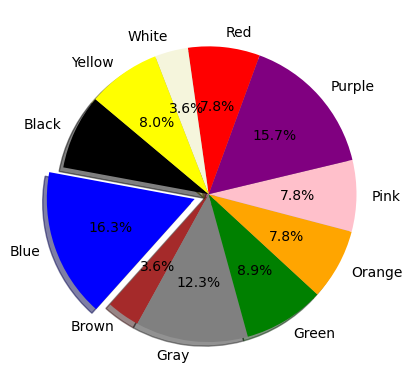

In [174]:
# Establish data for the pie chart
labels = ["Black", "Blue", "Brown", "Gray", "Green", "Orange", "Pink", "Purple", "Red", "White", "Yellow"]
sizes = [black_percent, blue_percent, brown_percent, gray_percent, green_percent, orange_percent, pink_percent, purple_percent, red_percent, white_percent, yellow_percent]
colors = ['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

This pie chart serves to portray the relative percentages of each color to be purchased by the sample overall. Further, according to the chart, blue and purple are the most common colors to be purchased, and white and brown are the least. 

In [71]:
## What type of color item is purchased most for each season?
color_organized_df.groupby(["Color Classifications"])["Season"].value_counts()

Color Classifications  Season
Black                  Spring     85
                       Winter     83
                       Summer     78
                       Fall       74
Blue                   Summer    173
                       Spring    168
                       Winter    152
                       Fall      142
Brown                  Winter     40
                       Fall       35
                       Summer     33
                       Spring     33
Gray                   Summer    136
                       Spring    124
                       Fall      117
                       Winter    102
Green                  Winter     93
                       Spring     90
                       Fall       84
                       Summer     79
Orange                 Fall       87
                       Winter     78
                       Spring     77
                       Summer     61
Pink                   Fall       85
                       Spring     81
        

In [72]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Color Classifications
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,Gray
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly,Purple
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly,Green
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months,Gray
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually,Blue
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly,Blue
3883,3884,34,Millennials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly,Purple
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly,Brown


In [75]:
# Filter the DataFrame down only to those columns to chart
fall_color = fall_df[["Season", "Color Classifications"]]

# Group by "Season" and "Category" and count the occurrences
fall_color_counts = fall_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
fall_color_counts = fall_color_counts.unstack()

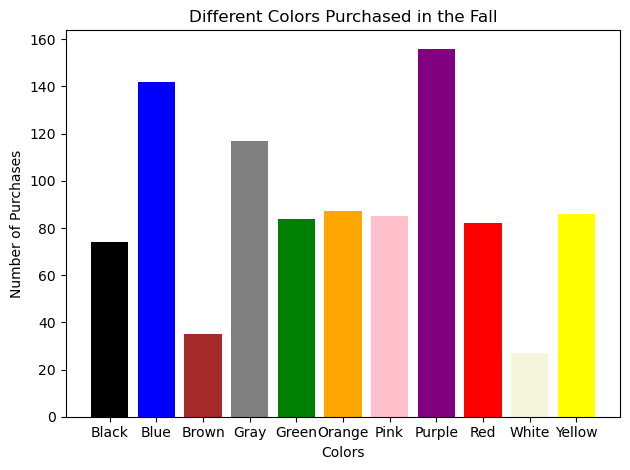

In [78]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(fall_color_counts.T.index, fall_color_counts.T["Fall"], color = color)
plt.title("Different Colors Purchased in the Fall")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

This bar graph portrays the amount of times each color was purchased in the Fall. According to the graph, blue and purple were overwhelimingly the most popular colors to purchase with brown and white being the least. 

In [79]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Color Classifications
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gray
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Red
7,8,27,Millennials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,Black
11,12,30,Millennials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly,Green
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly,Red
3880,3881,42,Millennials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly,Red
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly,Purple
3890,3891,35,Millennials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually,Green


In [80]:
# Filter the DataFrame down only to those columns to chart
winter_color = winter_df[["Season", "Color Classifications"]]

# Group by "Season" and "Category" and count the occurrences
winter_color_counts = winter_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
winter_color_counts = winter_color_counts.unstack()

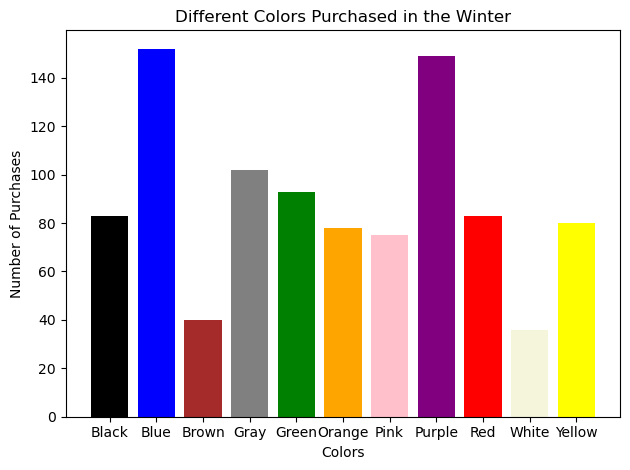

In [82]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(winter_color_counts.T.index, winter_color_counts.T["Winter"], color = color)
plt.title("Different Colors Purchased in the Winter")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [ ]:
This bar graph portrays the amount of times each color was purchased in the Winter. According to the graph, blue and purple were overwhelimingly the most popular colors to purchase with brown and white being the least. 

In [98]:

#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Red,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Red,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Blue,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Purple,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [87]:
# Filter the DataFrame down only to those columns to chart
spring_color = spring_df[["Season", "Color Classifications"]]

# Group by "Season" and "Color Classifications" and count the occurrences
spring_color_counts = spring_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Color Classifications" as columns
spring_color_counts = spring_color_counts.unstack()

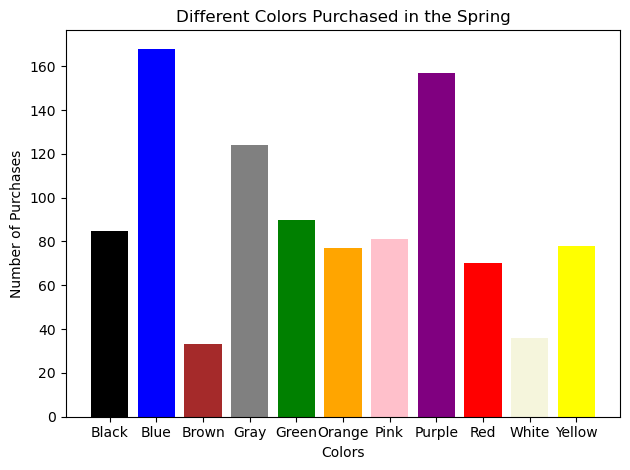

In [89]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(spring_color_counts.T.index, spring_color_counts.T["Spring"], color = color)
plt.title("Different Colors Purchased in the Spring")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [ ]:
This bar graph portrays the amount of times each color was purchased in the Spring. According to the graph, blue and purple were overwheliming the most popular colors to purchase with brown and white being the least. 

In [97]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(color_organized_df.loc[(color_organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Gray,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Orange,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millennials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millennials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Purple,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Blue,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [91]:
# Filter the DataFrame down only to those columns to chart
summer_color = summer_df[["Season", "Color Classifications"]]

# Group by "Season" and "Color Classifications" and count the occurrences
summer_color_counts = summer_color.groupby(["Season", "Color Classifications"]).size()

# Reshape the data to have "Season" as rows and "Class Classifications" as columns
summer_color_counts = summer_color_counts.unstack()

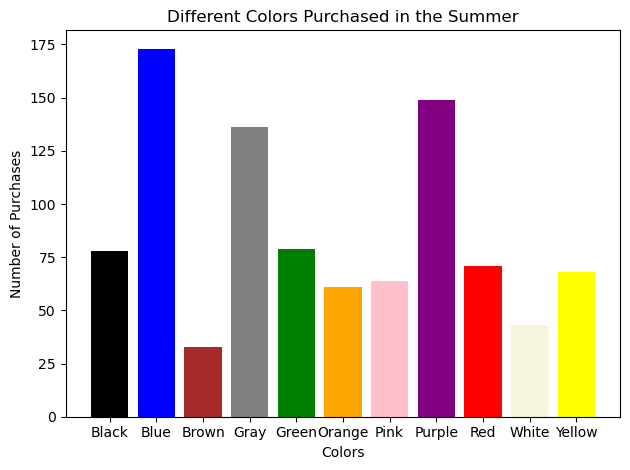

In [92]:
# Plot the data
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
fig, ax = plt.subplots()
ax.bar(summer_color_counts.T.index, summer_color_counts.T["Summer"], color = color)
plt.title("Different Colors Purchased in the Summer")
plt.xlabel("Colors")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [ ]:
This bar graph portrays the amount of times each color was purchased in the Summer According to the graph, blue and purple were overwheliming the most popular colors to purchase with brown and white being the least. 

In [133]:
# Filter the DataFrame down only to those columns to chart
rating_color = color_organized_df[["Color Classifications", "Review Rating"]]

# Group by "Season" and "Color Classifications" and count the occurrences
rating_color_counts = rating_color.groupby(["Color Classifications", "Review Rating"]).size()

# Reshape the data to have "Color Classifications" as rows and "Review Ratings" as columns
rating_color_counts = rating_color_counts.unstack()

# Calculate the average for each color across the rows
sum_rating_color = rating_color_counts.sum(axis='columns')

print(sum_rating_color)
rating_color_counts
color_organized_df

Color Classifications
Black     320.0
Blue      635.0
Brown     141.0
Gray      479.0
Green     346.0
Orange    303.0
Pink      305.0
Purple    611.0
Red       306.0
White     142.0
Yellow    312.0
dtype: float64


,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Color Classifications,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Red,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Red,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Red,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Blue,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Blue,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Gen X,Female,Shoes,Footwear,77,Minnesota,S,Brown,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


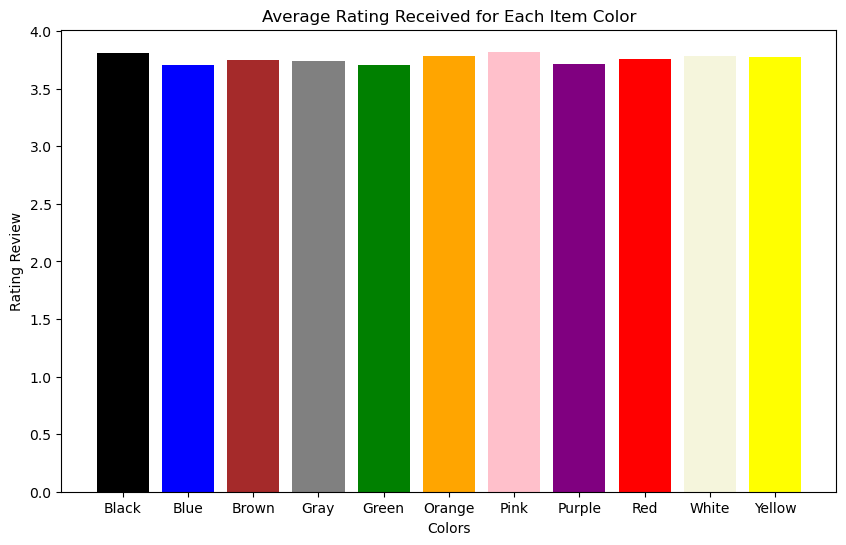

In [160]:
# Plot the average rating review received for each item color 
average_review_by_color = color_organized_df.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color')
plt.show()

This chart portrays the average rating that a customer in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection as well as to show if customers had preferences or aversions to any particular color. According to the chart, customers did not prefer or particularly dislike any color with the data showing an almost even split in ratings across all colors.

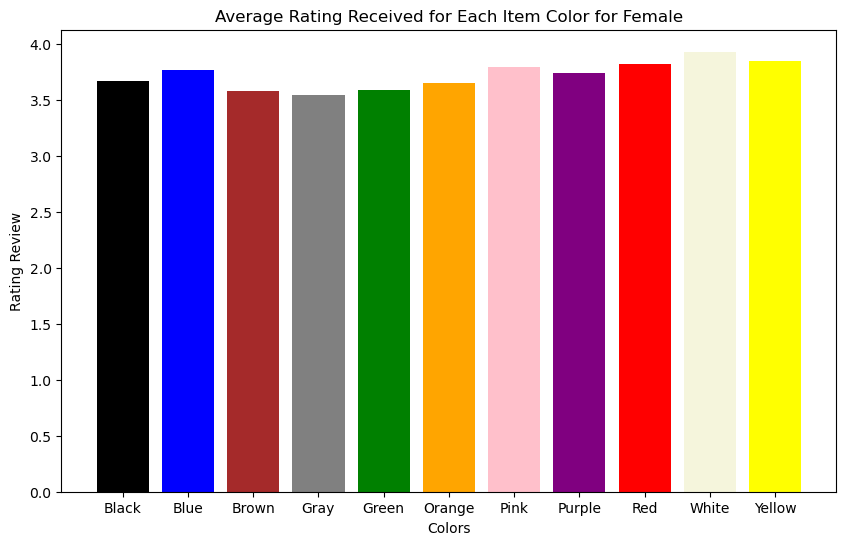

In [171]:
# Plot the average rating review received for each item color for female
female = color_organized_df.loc[(color_organized_df["Gender"]=="Female")].sample(n=198)
average_review_by_color = female.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color for Female')
plt.show()


This chart portrays the average rating that a female in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection that a female may have. Further, the chart seeks to assess whether a woman in a society powered by gender norms and ideologies would rate items that were in traditionally feminine hues like pink, yellow, or white more favorably than items in traditionally masculine hues like black, brown, and gray. However, according to the chart, this determination could not be made as females did not prefer or particularly dislike any color with the data showing an almost even split in ratings across all colors. However, it can be noted that females did rate "feminine" colors (pink, white, yellow, purple) slightly more favorably than traditionally masculine colors (black, brown, gray).

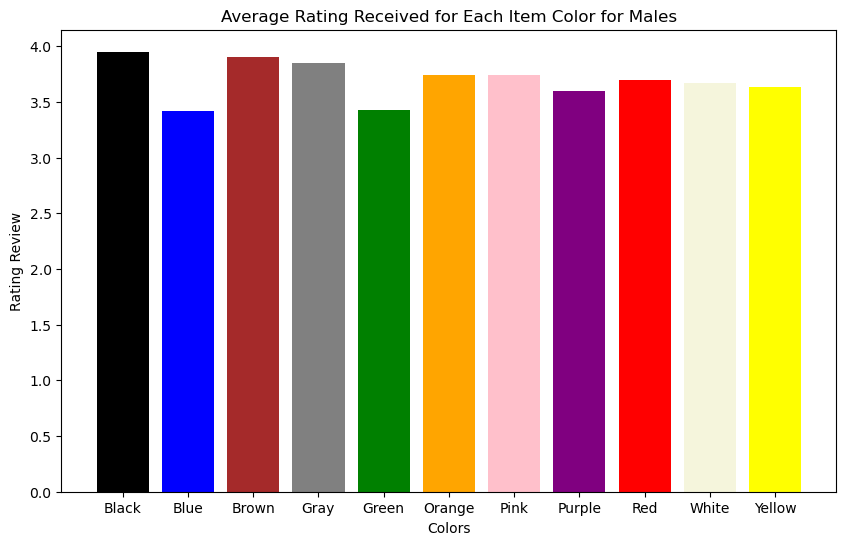

In [170]:
# Plot the average rating review received for each item color for males
male = color_organized_df.loc[(color_organized_df["Gender"]=="Male")].sample(n=198)
average_review_by_color = male.groupby('Color Classifications')['Review Rating'].mean().reset_index()
color = ['black','blue','brown','gray', 'green', 'orange', 'pink', 'purple', 'red', 'beige', 'yellow']
plt.figure(figsize=(10, 6))
plt.bar(average_review_by_color['Color Classifications'], average_review_by_color["Review Rating"], color = color)
plt.xlabel('Colors')
plt.ylabel('Rating Review')
plt.title('Average Rating Received for Each Item Color for Males')
plt.show()

This chart portrays the average rating that a male in the sample gave each item color. The purpose of this chart is to reveal any preferences in color selection that a male may have. Further, the chart seeks to assess whether a male in a society powered by gender norms and ideologies would rate items that were in traditionally masculine hues like black, brown, red, and gray more favorably than items in traditionally feminine hues like pink, purple, white and gray. However, according to the chart, this determination could not be made as males did not consistently prefer or particularly dislike any color with the data showing a similar split in ratings across all colors and deviating from statistical expectations. However, it can be noted that males did rate some "masculine" colors (black, brown, gray, and red) slightly more favorably than traditionally feminine colors (white and yellow). However. these results are inconsistent and ultimately inconclusive. 